# BIKE SHARING - DEMAND MODEL ASSIGNMENT
---------

 ### 1.  UNDERSTANDING THE DATA

In [1]:
### importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
### importing data into the notebook

df = pd.read_csv("day.csv")
df.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [3]:
#### checking shape of the data

df.shape

(730, 16)

- There are 730 rows and 16 columns in the dataset

In [4]:
### checking for null values in data, if any

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There are NO MISSING values in the dataset

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### DROPPING EXTRA COLUMNS

- Extra columns like "INSTANT" can be dropped as it shows the index and is of no significance for modelling.
- 'DTEDAY' column contains date in certain format and informtation from this column has already been derived in
    'yr', 'mnth', so it can be dropped as well.


In [6]:
## dropping columns  'instant' and 'dteday'

df.drop(["instant"], axis = 1, inplace = True)
df.drop(["dteday"], axis = 1, inplace = True)


In [7]:
df.shape

(730, 14)

In [8]:
## checking for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


- There are certain categorial columns with wrong data type that need fixation. These can't be integers.
    - Columns with wrong dataype
        - season
        - yr
        - mnth
        - holiday
        - weekday
        - workingday
        - weathersit

In [9]:
#### Replacing 'season' with suitable values
df["season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)


### Replacing 'yr' with suitable values
df['yr'].replace({0:'2018',1:'2019'},inplace=True)


### Replacing 'mnth'
df["mnth"].replace({1: 'Jan', 2:"Feb", 3:"Mar", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep" ,10:"Oct", 11:"Nov", 12:"Dec"}, inplace = True)


### Replacing "holiday"
df["holiday"].replace({0:"No Holiday", 1:"Holiday"}, inplace = True)


### Replacing "workingday"
df["workingday"].replace({0:"Working Day", 1:"No working"}, inplace = True)


#### Replacing "weekday"
df["weekday"].replace({0:"Mon", 1:"Tue", 2:"Wed", 3:"Thru", 4:"Fri", 5:"Sat", 6:"Sun"}, inplace = True)


### Replacing "weathersit"
df["weathersit"].replace({1:"Clear/Few Clouds", 2:"Cloudy/Misty", 3:"Light Rain/Snow", 4:"Heavy Rain/Snow"}, inplace = True)


df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No Holiday,Tue,No working,Cloudy/Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No Holiday,Wed,No working,Cloudy/Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No Holiday,Thru,No working,Clear/Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No Holiday,Fri,No working,Clear/Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No Holiday,Sat,No working,Clear/Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


------
####  'cnt' contains the sum of 'registered' and 'casual' , so columns 'registered' and 'casual' can be dropped too.
----

In [10]:
df.drop(["registered", "casual"], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Tue,No working,Cloudy/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Wed,No working,Cloudy/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Thru,No working,Clear/Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Fri,No working,Clear/Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Sat,No working,Clear/Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
### checking for null values and datatype again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


#### There are no null values


------

In [12]:
### checking for any abrupt values, if any
df.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


##### Data seems to be fine in terms of values, so no imputation required as of now
--------


### 2. DATA VISUALIZATION - EDA

In [13]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

---
###  Comparing target variable 'cnt' against categorial variables
----

##### Following are the categorial variables

- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

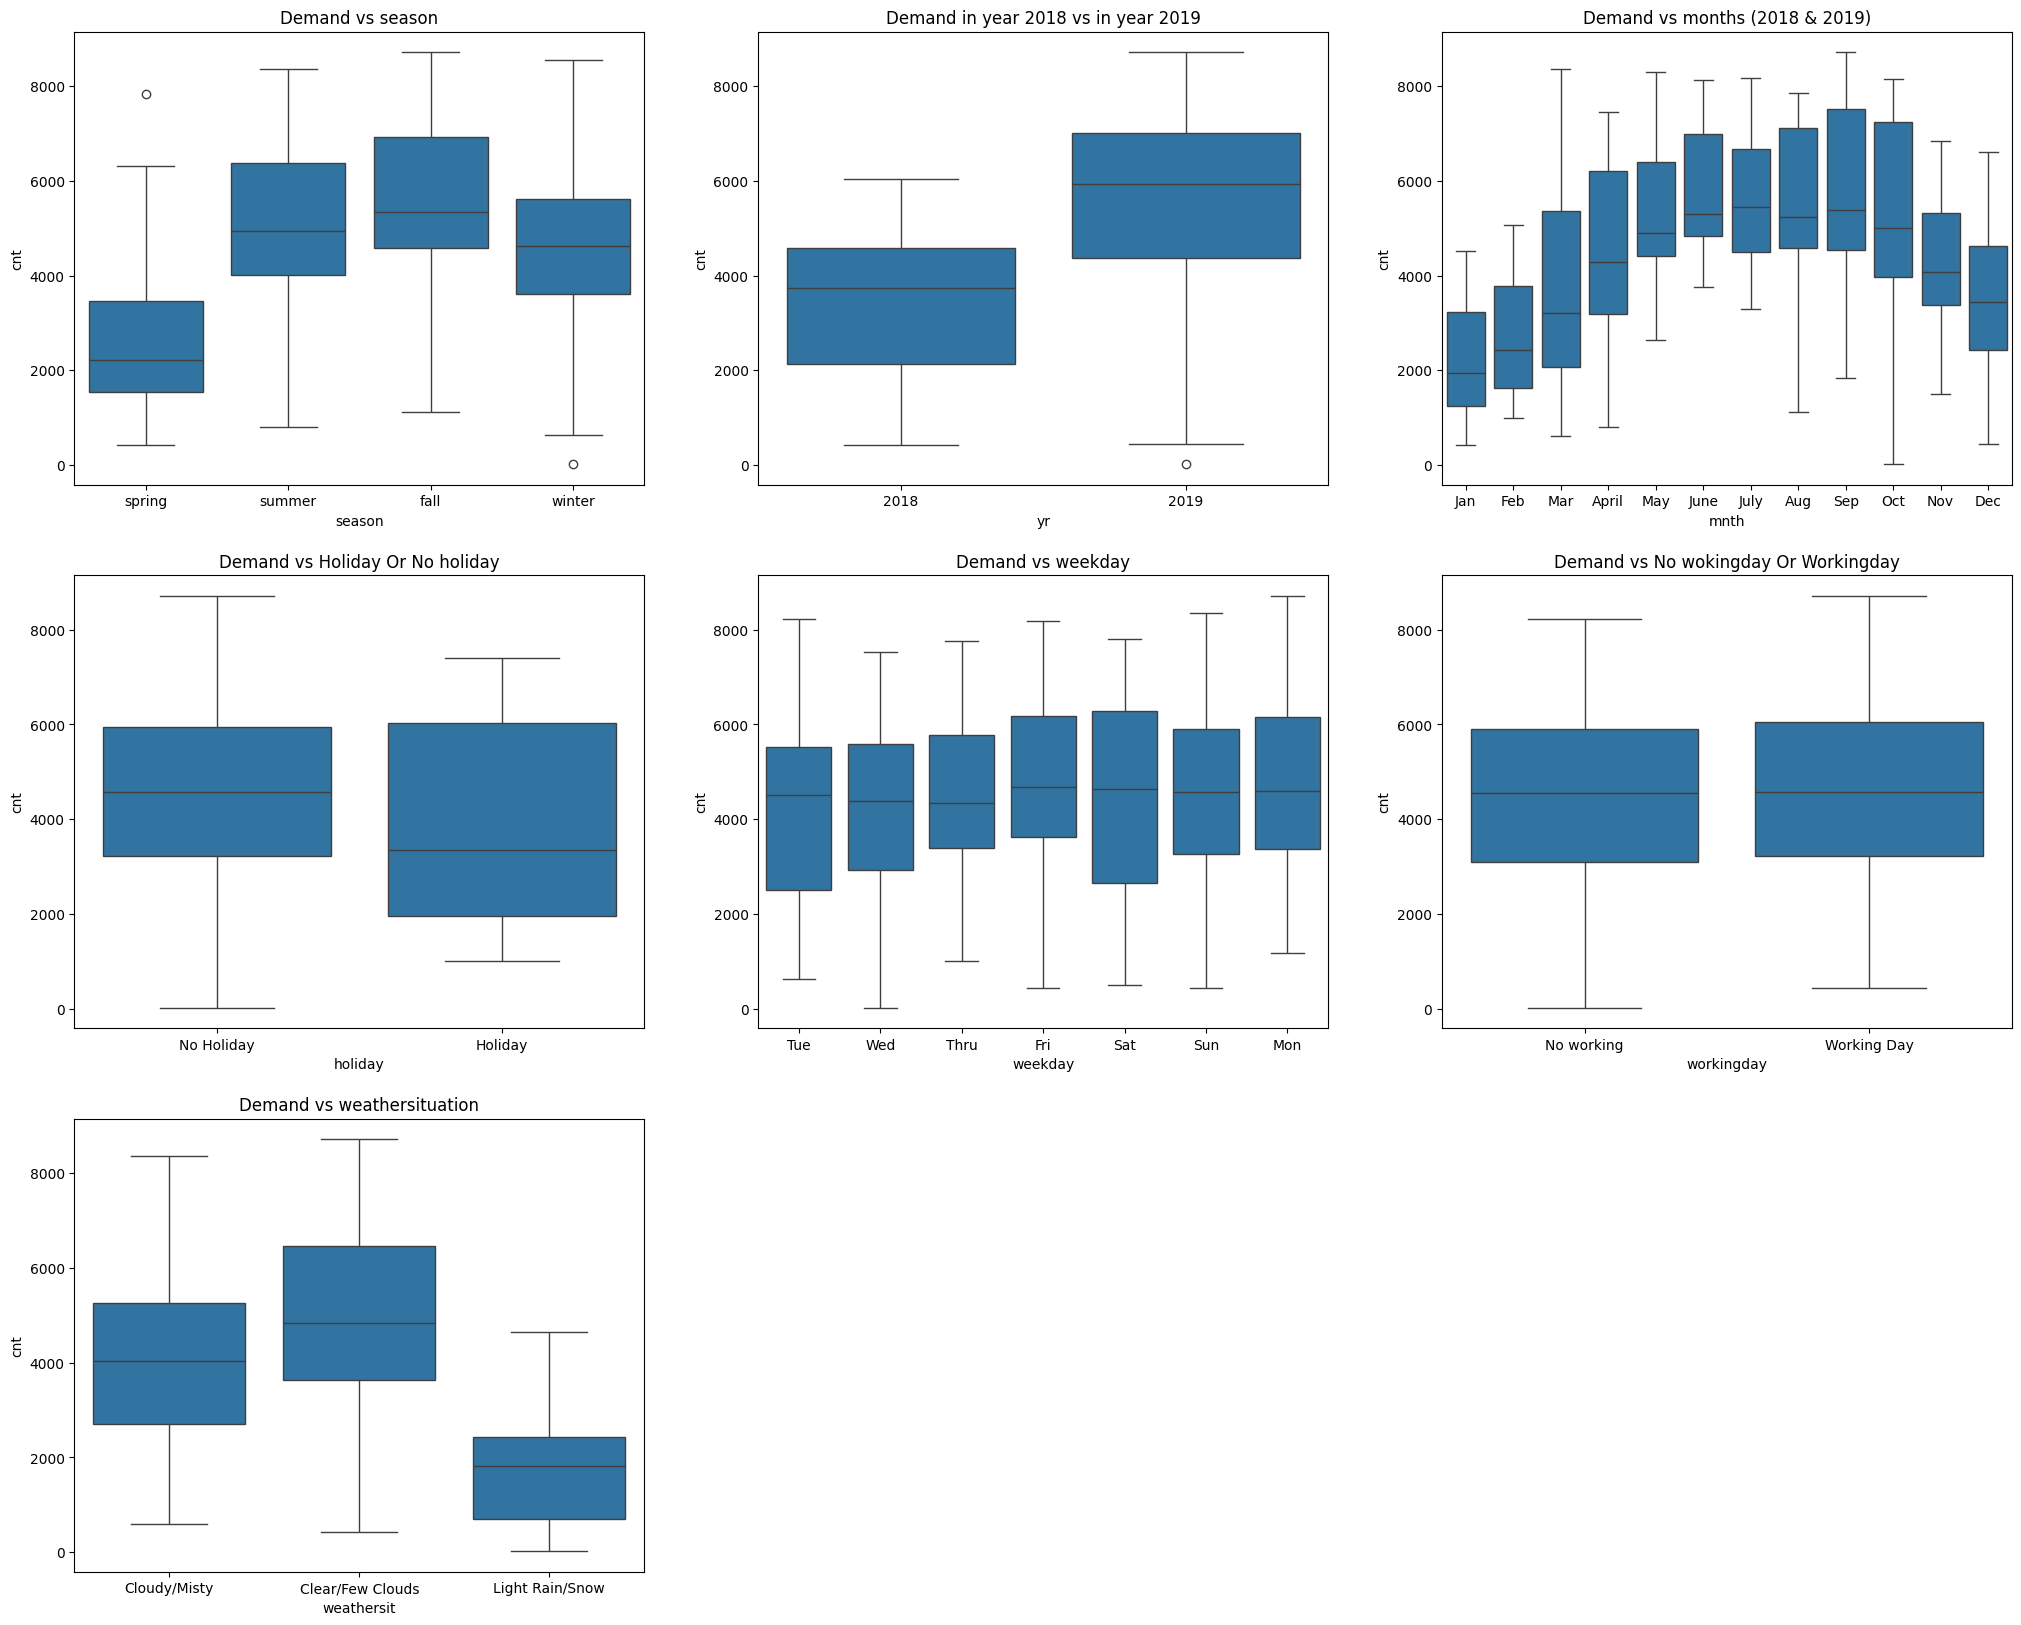

In [14]:
# Plotting box plot for categorical variables against target variable'cnt'
plt.figure(figsize=(25, 20)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df).set_title('Demand vs season')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df).set_title('Demand in year 2018 vs in year 2019')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df).set_title('Demand vs months (2018 & 2019)')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df).set_title('Demand vs Holiday Or No holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df).set_title('Demand vs weekday')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df).set_title('Demand vs No wokingday Or Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df).set_title('Demand vs weathersituation')

plt.show()

#### Analysis

- DEMAND VS SEASON : Demand is high during winterfall and summer , spring seems to have low demand.
-----

- DEMAND VS YEAR 2018 AND 2019 : Demand have increased in the next year as compared to the previous year 2018
----
- DEMAND VS BOTH YEARS (2018 & 2019) : During harsh weathers of winter demands for bikes seems to be less and its expected.
---
- DEMAND VS HOLIDAY/NON HOLIDAYS : Demand is high on non holidays as expected.
----
- DEMAND VS WEEKDAYS : There is no significant difference in the mean values but otherwise 'Friday' seems to have more demand
---
- DEMAND VS WORKING DAY : NO SIGNIFICANT DIFFERENCE IS SEEN IN DEMAND.
----

- DEMANS VS WEATHER SITUTION  : Demnad is less on rainy days. There is a little difference between demand on cloudy and clear days with clear days having more demand.
----

### - Comparing 'cnt' against 'numerical variable'.

- Numerical variables
  - temp
  - atemp
  - hum
  - windspeed

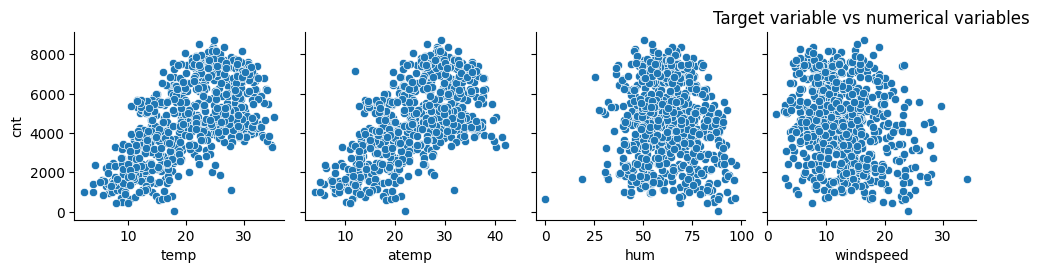

In [15]:
### Plotting scatter plot of numerical varibles against target variables

sns.pairplot(df,x_vars = ["temp", "atemp", "hum", "windspeed"], y_vars = ["cnt"])
plt.title("Target variable vs numerical variables")
plt.show()

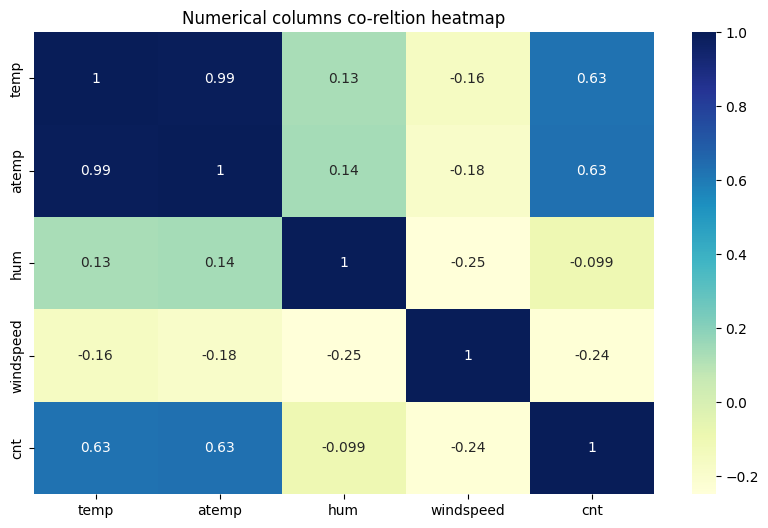

In [16]:
# Heatmap of all variables against each other to see ther co-relations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title("Numerical columns co-reltion heatmap")
plt.show()

#### # atemp and temp are highly correlated , hence atemp can be dropped .

In [17]:
#### dropping atemp from the dataset

df.drop(["atemp"], axis =1 , inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Tue,No working,Cloudy/Misty,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Wed,No working,Cloudy/Misty,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Thru,No working,Clear/Few Clouds,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Fri,No working,Clear/Few Clouds,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Sat,No working,Clear/Few Clouds,9.305237,43.6957,12.522300,1600


### 3. DATA PREPARATION

- CREATING DUMMY VARIABLE FOR CATEGORIAL VARIABLES

In [18]:
df_dm = pd.get_dummies(df[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
df_dm.head()



,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,weathersit_Cloudy/Misty,weathersit_Light Rain/Snow
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [19]:
#Joining orignal data and the dummy variable dataframe 'status'.

f_df = pd.concat([df, df_dm],axis=1)
f_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,weathersit_Cloudy/Misty,weathersit_Light Rain/Snow
0,spring,2018,Jan,No Holiday,Tue,No working,Cloudy/Misty,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,0,1,0
1,spring,2018,Jan,No Holiday,Wed,No working,Cloudy/Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,1,1,0
2,spring,2018,Jan,No Holiday,Thru,No working,Clear/Few Clouds,8.050924,43.7273,16.636703,...,0,0,0,0,0,1,0,0,0,0
3,spring,2018,Jan,No Holiday,Fri,No working,Clear/Few Clouds,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,2018,Jan,No Holiday,Sat,No working,Clear/Few Clouds,9.305237,43.6957,12.522300,...,0,0,0,1,0,0,0,0,0,0


In [20]:
### Dropping the original categorial columns

f_df = f_df.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
f_df.head()

,temp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,weathersit_Cloudy/Misty,weathersit_Light Rain/Snow
0,14.110847,80.5833,10.749882,985,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,8.050924,43.7273,16.636703,1349,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### 4. SPLITTING THE DATASET INTO TRAINING AND TESTING SETS

In [21]:
df_train , df_test = train_test_split(f_df , train_size=0.7 , random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [22]:
# Importing libraries to scale all the variables
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Creating an object to be scaled
scaler=MinMaxScaler()

In [24]:
# list of all the variables to be scaled
var_scale=['temp','hum','windspeed','cnt']

In [25]:
# Scale all the numerical variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale])
df_train.head()

,temp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,weathersit_Cloudy/Misty,weathersit_Light Rain/Snow
576,0.815169,0.725633,0.264686,0.827658,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,0.442393,0.640189,0.255342,0.465255,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,0.395666,0.504508,0.188475,0.482973,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [26]:
  df_train.describe()

,temp,hum,windspeed,cnt,yr_2019,holiday_No Holiday,workingday_Working Day,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,weathersit_Cloudy/Misty,weathersit_Light Rain/Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.507843,0.974510,0.288235,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.345098,0.029412
std,0.225858,0.145846,0.169803,0.224421,0.500429,0.157763,0.453386,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


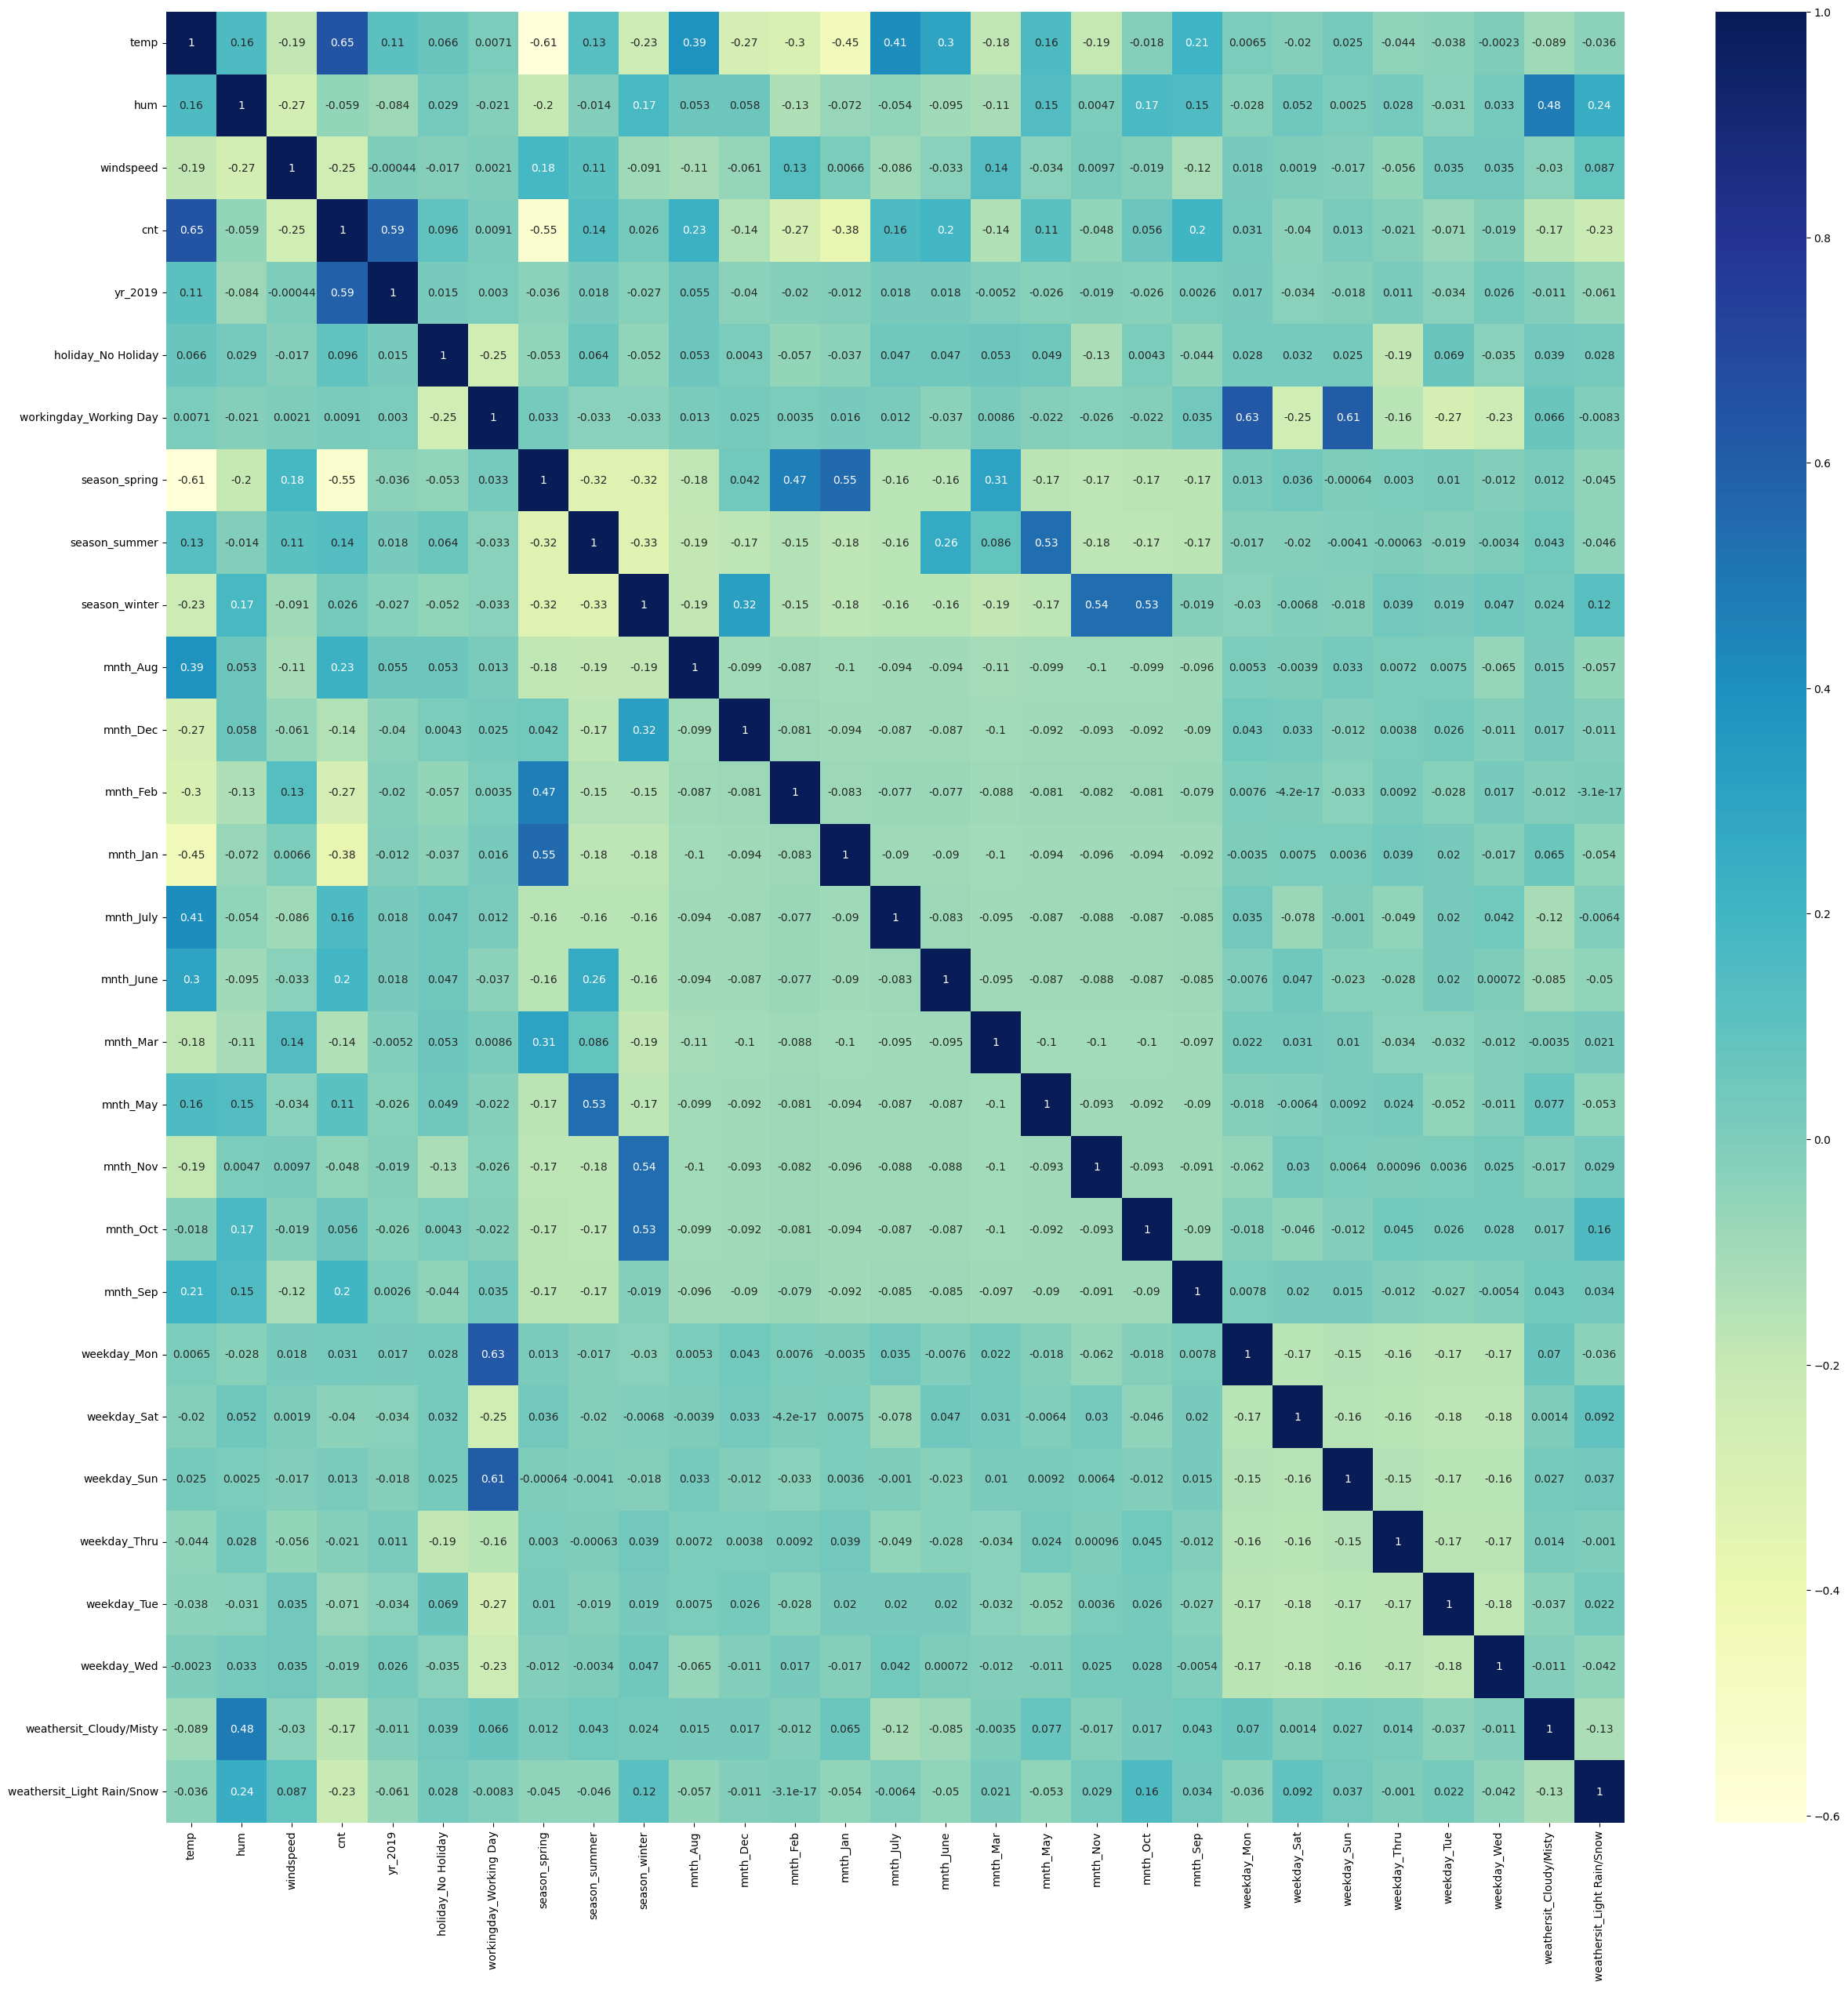

In [27]:
# Plotting the co-relation graph to check the co-relation between dummy variables

plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True, cmap= 'YlGnBu')
plt.show()

#### 'cnt' is highly correlated with the "temp" variable

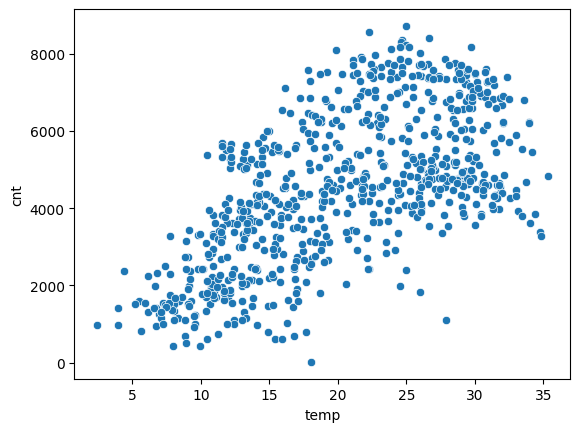

In [28]:
#### Scatter plot for temp and count

sns.scatterplot(x=df['temp'],y=df['cnt'],data=df)
plt.show()

#### Graph shows good linear relation between temp and count variables

**4. TRAINING THE DATA**


- SPLITTING INTO TRAIN DATA SET
- model 1

In [29]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train


### creating model with all variables

import statsmodels.api as sm


X_train_xm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_xm).fit()

lr.params
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.34e-178
Time:                        07:21:00   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2006      0.079      2.547      0.011       0.046       0.355
temp                           0.4405      0.047      9.412      0.000       0.349       0.532
hum                           -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed                     -0.1825      0.026     -7.003      0.000      -0.234      -0.131
yr_2019                        0.2311      0.008     28.384      0.000       0.215       0.247
holiday_No Holiday             0.1348      0.065      2.059      0.040       0.006       0.263
workingday_Working Day         0.0600      0.071      0.844      0.399      -0.080       0.200
season_spring                 -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_summer                  0.0464      0.026      1.761      0.079      -0.005       0.098
season_winter                  0.1126      0.028      3.994      0.000       0.057       0.168
mnth_Aug                       0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_Dec                      -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_Feb                      -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_Jan                      -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_July                     -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_June                      0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_Mar                       0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May                       0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_Nov                      -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_Oct                       0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_Sep                       0.0908      0.032      2.822      0.005       0.028       0.154
weekday_Mon                   -0.0537      0.072     -0.748      0.455      -0.195       0.087
weekday_Sat                   -0.0042      0.015     -0.282      0.778      -0.034       0.025
weekday_Sun                   -0.0599      0.072     -0.834      0.405      -0.201       0.081
weekday_Thru                  -0.0145      0.015     -0.936      0.349      -0.045       0.016
weekday_Tue                   -0.0288      0.015     -1.954      0.051      -0.058       0.000
weekday_Wed                   -0.0303      0.015     -2.055      0.040      -0.059      -0.001
weathersit_Cloudy/Misty       -0.0578      0.011     -5.495      0.000      -0.079      -0.037
weathersit_Light Rain/Snow    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
===========================================

In [30]:
# Importing the Variance Inflation library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# checking it's VIF

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,holiday_No Holiday,86.00
0,temp,44.24
1,hum,41.75
5,workingday_Working Day,41.65
20,weekday_Mon,22.83
22,weekday_Sun,21.47
6,season_spring,13.49
8,season_winter,12.26
7,season_summer,9.64
18,mnth_Oct,6.81


#### For the features having p_value more than .05 , dropping them. Also, VIF more than 5 is also not accpetable. Having more p value means we are having features that are very highly correlated.

In [32]:
#### dropping holiday_No Holiday

X=X.drop('holiday_No Holiday', axis = 1)

- model 2

In [33]:
X_train_cm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_cm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.07e-178
Time:                        07:21:04   Log-Likelihood:                 520.75
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     482   BIC:                            -866.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [34]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,37.98
0,temp,36.73
4,workingday_Working Day,15.01
5,season_spring,11.89
7,season_winter,11.70
19,weekday_Mon,9.07
21,weekday_Sun,8.59
6,season_summer,6.87
17,mnth_Oct,6.29
16,mnth_Nov,6.04


In [35]:
#### dropping working day as it has high vif

# Drop working day variable
X=X.drop('workingday_Working Day',1)

- model 3

In [36]:
# fitting the model again

X_train_cm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_cm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          2.79e-178
Time:                        07:21:17   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     483   BIC:                            -866.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3392      0.045      7.523      0.000       0.251       0.428
temp                           0.4319      0.047      9.172      0.000       0.339       0.524
hum                           -0.1548      0.039     -3.943      0.000      -0.232      -0.078
windspeed                     -0.1841      0.026     -7.003      0.000      -0.236      -0.132
yr_2019                        0.2322      0.008     28.308      0.000       0.216       0.248
season_spring                 -0.0414      0.031     -1.356      0.176      -0.101       0.019
season_summer                  0.0452      0.027      1.699      0.090      -0.007       0.098
season_winter                  0.1173      0.028      4.132      0.000       0.062       0.173
mnth_Aug                       0.0302      0.034      0.882      0.378      -0.037       0.097
mnth_Dec                      -0.0500      0.034     -1.463      0.144      -0.117       0.017
mnth_Feb                      -0.0417      0.034     -1.241      0.215      -0.108       0.024
mnth_Jan                      -0.0682      0.034     -1.994      0.047      -0.135      -0.001
mnth_July                     -0.0250      0.036     -0.702      0.483      -0.095       0.045
mnth_June                      0.0121      0.025      0.479      0.632      -0.037       0.062
mnth_Mar                       0.0016      0.025      0.066      0.948      -0.048       0.051
mnth_May                       0.0276      0.021      1.292      0.197      -0.014       0.070
mnth_Nov                      -0.0542      0.037     -1.474      0.141      -0.126       0.018
mnth_Oct                      -0.0002      0.037     -0.006      0.995      -0.072       0.071
mnth_Sep                       0.0878      0.032      2.704      0.007       0.024       0.152
weekday_Mon                    0.0039      0.015      0.256      0.798      -0.026       0.034
weekday_Sat                   -0.0051      0.015     -0.338      0.735      -0.035       0.025
weekday_Sun                   -0.0020      0.015     -0.130      0.896      -0.032       0.028
weekday_Thru                  -0.0222      0.015     -1.450      0.148      -0.052       0.008
weekday_Tue                   -0.0289      0.015     -1.941      0.053      -0.058       0.000
weekday_Wed                   -0.0331      0.015     -2.233      0.026      -0.062      -0.004
weathersit_Cloudy/Misty       -0.0565      0.011     -5.326      0.000      -0.077      -0.036
weathersit_Light Rain/Snow    -0.2469      0.027     -9.187      0.000      -0.300      -0.194
==============================================================================
Omnibus:                       90.354   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.

In [37]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,37.97
0,temp,36.58
4,season_spring,11.89
6,season_winter,11.62
5,season_summer,6.87
16,mnth_Oct,6.28
15,mnth_Nov,6.00
7,mnth_Aug,5.86
11,mnth_July,5.24
10,mnth_Jan,5.18


In [38]:
#### dropping 'humidity" as it has high vif

X=X.drop('hum',1)

- model 4


In [39]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_cm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          5.34e-176
Time:                        07:21:23   Log-Likelihood:                 509.16
No. Observations:                 510   AIC:                            -966.3
Df Residuals:                     484   BIC:                            -856.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2786      0.043      6.476      0.000       0.194       0.363
temp                           0.3813      0.046      8.292      0.000       0.291       0.472
windspeed                     -0.1558      0.026     -6.070      0.000      -0.206      -0.105
yr_2019                        0.2359      0.008     28.539      0.000       0.220       0.252
season_spring                 -0.0457      0.031     -1.477      0.140      -0.107       0.015
season_summer                  0.0361      0.027      1.343      0.180      -0.017       0.089
season_winter                  0.1134      0.029      3.939      0.000       0.057       0.170
mnth_Aug                       0.0270      0.035      0.777      0.437      -0.041       0.095
mnth_Dec                      -0.0723      0.034     -2.115      0.035      -0.140      -0.005
mnth_Feb                      -0.0551      0.034     -1.626      0.105      -0.122       0.011
mnth_Jan                      -0.0873      0.034     -2.543      0.011      -0.155      -0.020
mnth_July                     -0.0212      0.036     -0.588      0.557      -0.092       0.050
mnth_June                      0.0199      0.025      0.781      0.435      -0.030       0.070
mnth_Mar                      -0.0062      0.025     -0.245      0.807      -0.056       0.044
mnth_May                       0.0206      0.022      0.953      0.341      -0.022       0.063
mnth_Nov                      -0.0710      0.037     -1.916      0.056      -0.144       0.002
mnth_Oct                      -0.0179      0.037     -0.488      0.626      -0.090       0.054
mnth_Sep                       0.0760      0.033      2.316      0.021       0.012       0.140
weekday_Mon                    0.0053      0.015      0.344      0.731      -0.025       0.036
weekday_Sat                   -0.0071      0.015     -0.464      0.643      -0.037       0.023
weekday_Sun                   -0.0008      0.016     -0.051      0.960      -0.032       0.030
weekday_Thru                  -0.0235      0.016     -1.514      0.131      -0.054       0.007
weekday_Tue                   -0.0302      0.015     -1.997      0.046      -0.060      -0.000
weekday_Wed                   -0.0374      0.015     -2.487      0.013      -0.067      -0.008
weathersit_Cloudy/Misty       -0.0805      0.009     -9.118      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2888      0.025    -11.530      0.000      -0.338      -0.240
==============================================================================
Omnibus:                       90.156   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.747
Skew:                          -0.860   Prob(JB):                     9.67e-55
Kurtosis:   

In [40]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,26.47
3,season_spring,11.41
5,season_winter,11.40
15,mnth_Oct,5.84
4,season_summer,5.79
6,mnth_Aug,5.65
14,mnth_Nov,5.44
10,mnth_July,5.17
1,windspeed,4.96
9,mnth_Jan,4.55


In [41]:
# Spring and winter have a co-relation of -0.32 thus we can drop one of them too. Because we have summer, we need to have winter. Thus we can drop spring
X=X.drop('season_spring',1)

- model 5

In [42]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_cm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.50e-176
Time:                        07:21:24   Log-Likelihood:                 508.02
No. Observations:                 510   AIC:                            -966.0
Df Residuals:                     485   BIC:                            -860.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2505      0.039      6.485      0.000       0.175       0.326
temp                           0.3894      0.046      8.518      0.000       0.300       0.479
windspeed                     -0.1585      0.026     -6.185      0.000      -0.209      -0.108
yr_2019                        0.2357      0.008     28.478      0.000       0.219       0.252
season_summer                  0.0621      0.020      3.040      0.002       0.022       0.102
season_winter                  0.1390      0.023      6.028      0.000       0.094       0.184
mnth_Aug                       0.0500      0.031      1.611      0.108      -0.011       0.111
mnth_Dec                      -0.0771      0.034     -2.262      0.024      -0.144      -0.010
mnth_Feb                      -0.0734      0.032     -2.322      0.021      -0.136      -0.011
mnth_Jan                      -0.1050      0.032     -3.261      0.001      -0.168      -0.042
mnth_July                      0.0013      0.033      0.041      0.967      -0.063       0.066
mnth_June                      0.0267      0.025      1.064      0.288      -0.023       0.076
mnth_Mar                      -0.0184      0.024     -0.768      0.443      -0.065       0.029
mnth_May                       0.0189      0.022      0.875      0.382      -0.024       0.061
mnth_Nov                      -0.0701      0.037     -1.889      0.059      -0.143       0.003
mnth_Oct                      -0.0183      0.037     -0.496      0.620      -0.091       0.054
mnth_Sep                       0.0941      0.030      3.089      0.002       0.034       0.154
weekday_Mon                    0.0051      0.016      0.330      0.742      -0.025       0.036
weekday_Sat                   -0.0075      0.015     -0.491      0.624      -0.038       0.023
weekday_Sun                   -0.0019      0.016     -0.119      0.906      -0.033       0.029
weekday_Thru                  -0.0240      0.016     -1.543      0.124      -0.054       0.007
weekday_Tue                   -0.0315      0.015     -2.088      0.037      -0.061      -0.002
weekday_Wed                   -0.0381      0.015     -2.536      0.012      -0.068      -0.009
weathersit_Cloudy/Misty       -0.0804      0.009     -9.091      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2867      0.025    -11.450      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       87.613   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.799
Skew:                          -0.842   Prob(JB):                     2.30e-52
Kurtosis:                       5.891   Cond. No.                         31.4
============================

In [43]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.10
4,season_winter,7.96
14,mnth_Oct,5.55
5,mnth_Aug,5.09
13,mnth_Nov,5.07
1,windspeed,4.74
9,mnth_July,4.69
3,season_summer,4.13
15,mnth_Sep,3.75
6,mnth_Dec,3.40


In [44]:
# Month july has p-value of 0.967
X=X.drop('mnth_July',1)

- model 6

In [45]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.40e-177
Time:                        07:21:26   Log-Likelihood:                 508.02
No. Observations:                 510   AIC:                            -968.0
Df Residuals:                     486   BIC:                            -866.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2509      0.037      6.703      0.000       0.177       0.324
temp                           0.3902      0.041      9.566      0.000       0.310       0.470
windspeed                     -0.1586      0.025     -6.231      0.000      -0.209      -0.109
yr_2019                        0.2356      0.008     28.606      0.000       0.219       0.252
season_summer                  0.0616      0.017      3.704      0.000       0.029       0.094
season_winter                  0.1390      0.023      6.034      0.000       0.094       0.184
mnth_Aug                       0.0490      0.018      2.658      0.008       0.013       0.085
mnth_Dec                      -0.0777      0.030     -2.553      0.011      -0.138      -0.018
mnth_Feb                      -0.0740      0.028     -2.613      0.009      -0.130      -0.018
mnth_Jan                      -0.1056      0.030     -3.570      0.000      -0.164      -0.047
mnth_June                      0.0260      0.019      1.383      0.167      -0.011       0.063
mnth_Mar                      -0.0189      0.020     -0.922      0.357      -0.059       0.021
mnth_May                       0.0185      0.019      0.965      0.335      -0.019       0.056
mnth_Nov                      -0.0708      0.033     -2.125      0.034      -0.136      -0.005
mnth_Oct                      -0.0190      0.031     -0.607      0.544      -0.081       0.043
mnth_Sep                       0.0932      0.020      4.609      0.000       0.053       0.133
weekday_Mon                    0.0051      0.015      0.331      0.741      -0.025       0.036
weekday_Sat                   -0.0076      0.015     -0.494      0.622      -0.038       0.023
weekday_Sun                   -0.0019      0.016     -0.119      0.905      -0.033       0.029
weekday_Thru                  -0.0240      0.016     -1.544      0.123      -0.054       0.007
weekday_Tue                   -0.0315      0.015     -2.090      0.037      -0.061      -0.002
weekday_Wed                   -0.0381      0.015     -2.539      0.011      -0.068      -0.009
weathersit_Cloudy/Misty       -0.0804      0.009     -9.103      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2867      0.025    -11.469      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       87.468   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.122
Skew:                          -0.841   Prob(JB):                     3.23e-52
Kurtosis:                       5.886   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [46]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.23
4,season_winter,7.96
1,windspeed,4.73
12,mnth_Nov,4.35
13,mnth_Oct,4.30
6,mnth_Dec,2.88
3,season_summer,2.86
2,yr_2019,2.10
16,weekday_Sat,2.01
20,weekday_Wed,2.00


In [47]:
# weekday_sunday has a high p-value of 0.905
X=X.drop('weekday_Sun',1)

-model 7

In [48]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_cm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.29e-178
Time:                        07:21:28   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     487   BIC:                            -872.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2500      0.037      6.834      0.000       0.178       0.322
temp                           0.3903      0.041      9.579      0.000       0.310       0.470
windspeed                     -0.1586      0.025     -6.238      0.000      -0.209      -0.109
yr_2019                        0.2357      0.008     28.646      0.000       0.219       0.252
season_summer                  0.0616      0.017      3.713      0.000       0.029       0.094
season_winter                  0.1390      0.023      6.044      0.000       0.094       0.184
mnth_Aug                       0.0489      0.018      2.659      0.008       0.013       0.085
mnth_Dec                      -0.0778      0.030     -2.560      0.011      -0.138      -0.018
mnth_Feb                      -0.0739      0.028     -2.614      0.009      -0.129      -0.018
mnth_Jan                      -0.1056      0.030     -3.574      0.000      -0.164      -0.048
mnth_June                      0.0260      0.019      1.382      0.168      -0.011       0.063
mnth_Mar                      -0.0189      0.020     -0.922      0.357      -0.059       0.021
mnth_May                       0.0185      0.019      0.967      0.334      -0.019       0.056
mnth_Nov                      -0.0709      0.033     -2.129      0.034      -0.136      -0.005
mnth_Oct                      -0.0191      0.031     -0.609      0.543      -0.081       0.043
mnth_Sep                       0.0932      0.020      4.613      0.000       0.053       0.133
weekday_Mon                    0.0060      0.014      0.446      0.656      -0.021       0.033
weekday_Sat                   -0.0067      0.013     -0.502      0.616      -0.033       0.019
weekday_Thru                  -0.0231      0.014     -1.702      0.089      -0.050       0.004
weekday_Tue                   -0.0306      0.013     -2.350      0.019      -0.056      -0.005
weekday_Wed                   -0.0372      0.013     -2.858      0.004      -0.063      -0.012
weathersit_Cloudy/Misty       -0.0804      0.009     -9.140      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2869      0.025    -11.524      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       87.662   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.481
Skew:                          -0.843   Prob(JB):                     2.70e-52
Kurtosis:                       5.887   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_winter,7.96
0,temp,7.25
1,windspeed,4.71
13,mnth_Oct,4.26
12,mnth_Nov,4.26
3,season_summer,2.82
6,mnth_Dec,2.75
2,yr_2019,2.10
5,mnth_Aug,1.90
11,mnth_May,1.89


In [50]:
### dropping weekday mon as it has high p value

X=X.drop('weekday_Mon',1)


- model 8

In [51]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_cm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.27e-179
Time:                        07:21:32   Log-Likelihood:                 507.91
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     488   BIC:                            -878.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2521      0.036      6.964      0.000       0.181       0.323
temp                           0.3899      0.041      9.580      0.000       0.310       0.470
windspeed                     -0.1583      0.025     -6.232      0.000      -0.208      -0.108
yr_2019                        0.2357      0.008     28.675      0.000       0.220       0.252
season_summer                  0.0613      0.017      3.701      0.000       0.029       0.094
season_winter                  0.1391      0.023      6.054      0.000       0.094       0.184
mnth_Aug                       0.0487      0.018      2.652      0.008       0.013       0.085
mnth_Dec                      -0.0777      0.030     -2.559      0.011      -0.137      -0.018
mnth_Feb                      -0.0742      0.028     -2.626      0.009      -0.130      -0.019
mnth_Jan                      -0.1058      0.030     -3.587      0.000      -0.164      -0.048
mnth_June                      0.0261      0.019      1.391      0.165      -0.011       0.063
mnth_Mar                      -0.0190      0.020     -0.930      0.353      -0.059       0.021
mnth_May                       0.0184      0.019      0.960      0.337      -0.019       0.056
mnth_Nov                      -0.0715      0.033     -2.151      0.032      -0.137      -0.006
mnth_Oct                      -0.0194      0.031     -0.619      0.536      -0.081       0.042
mnth_Sep                       0.0930      0.020      4.609      0.000       0.053       0.133
weekday_Sat                   -0.0087      0.012     -0.697      0.486      -0.033       0.016
weekday_Thru                  -0.0251      0.013     -1.964      0.050      -0.050    1.67e-05
weekday_Tue                   -0.0327      0.012     -2.679      0.008      -0.057      -0.009
weekday_Wed                   -0.0393      0.012     -3.219      0.001      -0.063      -0.015
weathersit_Cloudy/Misty       -0.0802      0.009     -9.138      0.000      -0.097      -0.063
weathersit_Light Rain/Snow    -0.2870      0.025    -11.536      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       86.443   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.594
Skew:                          -0.831   Prob(JB):                     1.14e-51
Kurtosis:                       5.877   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_winter,7.96
0,temp,6.90
1,windspeed,4.68
12,mnth_Nov,4.26
13,mnth_Oct,4.25
3,season_summer,2.82
6,mnth_Dec,2.71
2,yr_2019,2.09
5,mnth_Aug,1.90
11,mnth_May,1.89


In [53]:
### dropping mnth_Oct having high p value

X=X.drop('mnth_Oct',1)

-model 9


In [54]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_cm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.33e-180
Time:                        07:21:34   Log-Likelihood:                 507.71
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     489   BIC:                            -884.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2432      0.033      7.329      0.000       0.178       0.308
temp                           0.3976      0.039     10.258      0.000       0.321       0.474
windspeed                     -0.1588      0.025     -6.261      0.000      -0.209      -0.109
yr_2019                        0.2358      0.008     28.709      0.000       0.220       0.252
season_summer                  0.0650      0.015      4.207      0.000       0.035       0.095
season_winter                  0.1288      0.016      8.130      0.000       0.098       0.160
mnth_Aug                       0.0517      0.018      2.916      0.004       0.017       0.087
mnth_Dec                      -0.0639      0.021     -3.101      0.002      -0.104      -0.023
mnth_Feb                      -0.0671      0.026     -2.598      0.010      -0.118      -0.016
mnth_Jan                      -0.0983      0.027     -3.661      0.000      -0.151      -0.046
mnth_June                      0.0269      0.019      1.440      0.151      -0.010       0.064
mnth_Mar                      -0.0143      0.019     -0.754      0.452      -0.052       0.023
mnth_May                       0.0189      0.019      0.987      0.324      -0.019       0.056
mnth_Nov                      -0.0550      0.020     -2.767      0.006      -0.094      -0.016
mnth_Sep                       0.0991      0.018      5.639      0.000       0.065       0.134
weekday_Sat                   -0.0088      0.012     -0.711      0.478      -0.033       0.016
weekday_Thru                  -0.0252      0.013     -1.976      0.049      -0.050      -0.000
weekday_Tue                   -0.0326      0.012     -2.678      0.008      -0.057      -0.009
weekday_Wed                   -0.0391      0.012     -3.207      0.001      -0.063      -0.015
weathersit_Cloudy/Misty       -0.0804      0.009     -9.175      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2880      0.025    -11.615      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       87.483   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.755
Skew:                          -0.840   Prob(JB):                     2.36e-52
Kurtosis:                       5.892   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.79
1,windspeed,4.52
4,season_winter,2.80
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.83
12,mnth_Nov,1.81
9,mnth_June,1.62
18,weathersit_Cloudy/Misty,1.60


In [56]:
#### dropping weekday_Sat

X=X.drop('weekday_Sat',1)

-model 10

In [57]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_cm).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.44e-181
Time:                        07:21:37   Log-Likelihood:                 507.44
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     490   BIC:                            -890.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2410      0.033      7.298      0.000       0.176       0.306
temp                           0.3980      0.039     10.277      0.000       0.322       0.474
windspeed                     -0.1589      0.025     -6.266      0.000      -0.209      -0.109
yr_2019                        0.2359      0.008     28.748      0.000       0.220       0.252
season_summer                  0.0652      0.015      4.223      0.000       0.035       0.096
season_winter                  0.1289      0.016      8.142      0.000       0.098       0.160
mnth_Aug                       0.0513      0.018      2.898      0.004       0.017       0.086
mnth_Dec                      -0.0647      0.021     -3.142      0.002      -0.105      -0.024
mnth_Feb                      -0.0673      0.026     -2.607      0.009      -0.118      -0.017
mnth_Jan                      -0.0987      0.027     -3.679      0.000      -0.151      -0.046
mnth_June                      0.0258      0.019      1.385      0.167      -0.011       0.062
mnth_Mar                      -0.0147      0.019     -0.777      0.438      -0.052       0.023
mnth_May                       0.0184      0.019      0.965      0.335      -0.019       0.056
mnth_Nov                      -0.0558      0.020     -2.810      0.005      -0.095      -0.017
mnth_Sep                       0.0986      0.018      5.618      0.000       0.064       0.133
weekday_Thru                  -0.0229      0.012     -1.857      0.064      -0.047       0.001
weekday_Tue                   -0.0303      0.012     -2.583      0.010      -0.053      -0.007
weekday_Wed                   -0.0368      0.012     -3.131      0.002      -0.060      -0.014
weathersit_Cloudy/Misty       -0.0804      0.009     -9.181      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2897      0.025    -11.744      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       87.256   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.964
Skew:                          -0.833   Prob(JB):                     4.74e-53
Kurtosis:                       5.927   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.65
1,windspeed,4.51
4,season_winter,2.79
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
17,weathersit_Cloudy/Misty,1.60


In [59]:
### dropping mnth_Mar

X=X.drop('mnth_Mar',1)

- model 11

In [60]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.60e-182
Time:                        07:21:40   Log-Likelihood:                 507.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     491   BIC:                            -895.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2254      0.026      8.599      0.000       0.174       0.277
temp                           0.4136      0.033     12.486      0.000       0.349       0.479
windspeed                     -0.1586      0.025     -6.261      0.000      -0.208      -0.109
yr_2019                        0.2356      0.008     28.758      0.000       0.219       0.252
season_summer                  0.0685      0.015      4.613      0.000       0.039       0.098
season_winter                  0.1342      0.014      9.401      0.000       0.106       0.162
mnth_Aug                       0.0544      0.017      3.146      0.002       0.020       0.088
mnth_Dec                      -0.0581      0.019     -3.097      0.002      -0.095      -0.021
mnth_Feb                      -0.0563      0.022     -2.610      0.009      -0.099      -0.014
mnth_Jan                      -0.0865      0.022     -3.974      0.000      -0.129      -0.044
mnth_June                      0.0272      0.019      1.465      0.144      -0.009       0.064
mnth_May                       0.0205      0.019      1.086      0.278      -0.017       0.058
mnth_Nov                      -0.0517      0.019     -2.702      0.007      -0.089      -0.014
mnth_Sep                       0.1022      0.017      6.029      0.000       0.069       0.135
weekday_Thru                  -0.0225      0.012     -1.830      0.068      -0.047       0.002
weekday_Tue                   -0.0295      0.012     -2.526      0.012      -0.052      -0.007
weekday_Wed                   -0.0365      0.012     -3.109      0.002      -0.060      -0.013
weathersit_Cloudy/Misty       -0.0805      0.009     -9.196      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2894      0.025    -11.737      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       84.609   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.723
Skew:                          -0.821   Prob(JB):                     1.59e-49
Kurtosis:                       5.807   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.62
1,windspeed,4.16
3,season_summer,2.72
4,season_winter,2.71
2,yr_2019,2.08
10,mnth_May,1.80
11,mnth_Nov,1.79
5,mnth_Aug,1.76
16,weathersit_Cloudy/Misty,1.58
9,mnth_June,1.54


In [62]:
### dropping mnth_May

X=X.drop('mnth_May',1)


- model 12

In [63]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_cm).fit()
lr_12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          2.29e-183
Time:                        07:21:42   Log-Likelihood:                 506.52
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     492   BIC:                            -900.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2207      0.026      8.535      0.000       0.170       0.271
temp                           0.4239      0.032     13.350      0.000       0.362       0.486
windspeed                     -0.1610      0.025     -6.377      0.000      -0.211      -0.111
yr_2019                        0.2349      0.008     28.752      0.000       0.219       0.251
season_summer                  0.0767      0.013      5.990      0.000       0.052       0.102
season_winter                  0.1344      0.014      9.411      0.000       0.106       0.162
mnth_Aug                       0.0516      0.017      3.019      0.003       0.018       0.085
mnth_Dec                      -0.0561      0.019     -3.005      0.003      -0.093      -0.019
mnth_Feb                      -0.0534      0.021     -2.494      0.013      -0.096      -0.011
mnth_Jan                      -0.0832      0.022     -3.857      0.000      -0.126      -0.041
mnth_June                      0.0197      0.017      1.143      0.254      -0.014       0.054
mnth_Nov                      -0.0503      0.019     -2.631      0.009      -0.088      -0.013
mnth_Sep                       0.1005      0.017      5.953      0.000       0.067       0.134
weekday_Thru                  -0.0223      0.012     -1.810      0.071      -0.047       0.002
weekday_Tue                   -0.0298      0.012     -2.553      0.011      -0.053      -0.007
weekday_Wed                   -0.0368      0.012     -3.130      0.002      -0.060      -0.014
weathersit_Cloudy/Misty       -0.0799      0.009     -9.146      0.000      -0.097      -0.063
weathersit_Light Rain/Snow    -0.2900      0.025    -11.762      0.000      -0.338      -0.242
==============================================================================
Omnibus:                       83.615   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.691
Skew:                          -0.825   Prob(JB):                     3.96e-47
Kurtosis:                       5.708   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.12
1,windspeed,4.02
4,season_winter,2.70
2,yr_2019,2.07
3,season_summer,2.07
10,mnth_Nov,1.79
5,mnth_Aug,1.72
15,weathersit_Cloudy/Misty,1.58
6,mnth_Dec,1.42
11,mnth_Sep,1.39


In [65]:
#### dropping mnth_June

X=X.drop('mnth_June',1)

- model 13

In [66]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          3.39e-184
Time:                        07:21:44   Log-Likelihood:                 505.84
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     493   BIC:                            -905.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2158      0.026      8.460      0.000       0.166       0.266
temp                           0.4359      0.030     14.546      0.000       0.377       0.495
windspeed                     -0.1615      0.025     -6.394      0.000      -0.211      -0.112
yr_2019                        0.2347      0.008     28.724      0.000       0.219       0.251
season_summer                  0.0788      0.013      6.222      0.000       0.054       0.104
season_winter                  0.1337      0.014      9.368      0.000       0.106       0.162
mnth_Aug                       0.0472      0.017      2.832      0.005       0.014       0.080
mnth_Dec                      -0.0545      0.019     -2.923      0.004      -0.091      -0.018
mnth_Feb                      -0.0516      0.021     -2.414      0.016      -0.094      -0.010
mnth_Jan                      -0.0804      0.021     -3.753      0.000      -0.123      -0.038
mnth_Nov                      -0.0491      0.019     -2.572      0.010      -0.087      -0.012
mnth_Sep                       0.0975      0.017      5.846      0.000       0.065       0.130
weekday_Thru                  -0.0224      0.012     -1.814      0.070      -0.047       0.002
weekday_Tue                   -0.0293      0.012     -2.510      0.012      -0.052      -0.006
weekday_Wed                   -0.0369      0.012     -3.137      0.002      -0.060      -0.014
weathersit_Cloudy/Misty       -0.0804      0.009     -9.213      0.000      -0.098      -0.063
weathersit_Light Rain/Snow    -0.2908      0.025    -11.795      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       82.779   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.700
Skew:                          -0.822   Prob(JB):                     4.80e-46
Kurtosis:                       5.669   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.31
1,windspeed,3.98
4,season_winter,2.67
2,yr_2019,2.06
3,season_summer,2.05
9,mnth_Nov,1.79
5,mnth_Aug,1.63
14,weathersit_Cloudy/Misty,1.57
6,mnth_Dec,1.42
10,mnth_Sep,1.34


In [68]:
### dropping weekday_Thru

X=X.drop('weekday_Thru',1)

- model 14

In [69]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.30e-184
Time:                        07:21:47   Log-Likelihood:                 504.14
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     494   BIC:                            -908.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2106      0.025      8.289      0.000       0.161       0.261
temp                           0.4376      0.030     14.576      0.000       0.379       0.497
windspeed                     -0.1594      0.025     -6.303      0.000      -0.209      -0.110
yr_2019                        0.2345      0.008     28.635      0.000       0.218       0.251
season_summer                  0.0780      0.013      6.150      0.000       0.053       0.103
season_winter                  0.1319      0.014      9.242      0.000       0.104       0.160
mnth_Aug                       0.0463      0.017      2.773      0.006       0.013       0.079
mnth_Dec                      -0.0537      0.019     -2.875      0.004      -0.090      -0.017
mnth_Feb                      -0.0523      0.021     -2.440      0.015      -0.094      -0.010
mnth_Jan                      -0.0816      0.021     -3.799      0.000      -0.124      -0.039
mnth_Nov                      -0.0479      0.019     -2.506      0.013      -0.085      -0.010
mnth_Sep                       0.0976      0.017      5.834      0.000       0.065       0.130
weekday_Tue                   -0.0249      0.011     -2.176      0.030      -0.047      -0.002
weekday_Wed                   -0.0325      0.012     -2.817      0.005      -0.055      -0.010
weathersit_Cloudy/Misty       -0.0803      0.009     -9.174      0.000      -0.097      -0.063
weathersit_Light Rain/Snow    -0.2904      0.025    -11.754      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       81.748   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.393
Skew:                          -0.805   Prob(JB):                     2.06e-46
Kurtosis:                       5.704   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.24
1,windspeed,3.98
4,season_winter,2.63
2,yr_2019,2.06
3,season_summer,2.04
9,mnth_Nov,1.79
5,mnth_Aug,1.63
13,weathersit_Cloudy/Misty,1.57
6,mnth_Dec,1.42
10,mnth_Sep,1.34


In [71]:
#### dropping weekday_Tue
X=X.drop('weekday_Tue',1)

- model 15

In [72]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_cm).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.8
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          9.89e-185
Time:                        07:21:49   Log-Likelihood:                 501.71
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     495   BIC:                            -909.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2047      0.025      8.072      0.000       0.155       0.255
temp                           0.4398      0.030     14.600      0.000       0.381       0.499
windspeed                     -0.1615      0.025     -6.368      0.000      -0.211      -0.112
yr_2019                        0.2350      0.008     28.593      0.000       0.219       0.251
season_summer                  0.0786      0.013      6.177      0.000       0.054       0.104
season_winter                  0.1316      0.014      9.187      0.000       0.103       0.160
mnth_Aug                       0.0460      0.017      2.747      0.006       0.013       0.079
mnth_Dec                      -0.0534      0.019     -2.851      0.005      -0.090      -0.017
mnth_Feb                      -0.0503      0.021     -2.342      0.020      -0.092      -0.008
mnth_Jan                      -0.0810      0.022     -3.760      0.000      -0.123      -0.039
mnth_Nov                      -0.0471      0.019     -2.455      0.014      -0.085      -0.009
mnth_Sep                       0.0983      0.017      5.858      0.000       0.065       0.131
weekday_Wed                   -0.0279      0.011     -2.453      0.015      -0.050      -0.006
weathersit_Cloudy/Misty       -0.0795      0.009     -9.058      0.000      -0.097      -0.062
weathersit_Light Rain/Snow    -0.2904      0.025    -11.709      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       82.002   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.983
Skew:                          -0.819   Prob(JB):                     5.08e-45
Kurtosis:                       5.630   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.17
1,windspeed,3.94
4,season_winter,2.62
2,yr_2019,2.06
3,season_summer,2.04
9,mnth_Nov,1.79
5,mnth_Aug,1.63
12,weathersit_Cloudy/Misty,1.57
6,mnth_Dec,1.41
10,mnth_Sep,1.34


In [74]:
#### dropping mnth_Nov
X=X.drop('mnth_Nov',1)


- model 16

In [75]:
X_train_cm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_cm).fit()
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.38e-184
Time:                        07:21:52   Log-Likelihood:                 498.62
No. Observations:                 510   AIC:                            -969.2
Df Residuals:                     496   BIC:                            -910.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1886      0.025      7.661      0.000       0.140       0.237
temp                           0.4587      0.029     15.680      0.000       0.401       0.516
windspeed                     -0.1615      0.025     -6.337      0.000      -0.212      -0.111
yr_2019                        0.2348      0.008     28.432      0.000       0.219       0.251
season_summer                  0.0832      0.013      6.570      0.000       0.058       0.108
season_winter                  0.1171      0.013      8.925      0.000       0.091       0.143
mnth_Aug                       0.0465      0.017      2.764      0.006       0.013       0.080
mnth_Dec                      -0.0340      0.017     -1.993      0.047      -0.068      -0.000
mnth_Feb                      -0.0401      0.021     -1.894      0.059      -0.082       0.002
mnth_Jan                      -0.0694      0.021     -3.284      0.001      -0.111      -0.028
mnth_Sep                       0.1038      0.017      6.207      0.000       0.071       0.137
weekday_Wed                   -0.0276      0.011     -2.413      0.016      -0.050      -0.005
weathersit_Cloudy/Misty       -0.0786      0.009     -8.916      0.000      -0.096      -0.061
weathersit_Light Rain/Snow    -0.2855      0.025    -11.490      0.000      -0.334      -0.237
==============================================================================
Omnibus:                       78.161   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.128
Skew:                          -0.788   Prob(JB):                     3.14e-42
Kurtosis:                       5.551   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.15
1,windspeed,3.85
2,yr_2019,2.06
3,season_summer,2.03
4,season_winter,1.77
5,mnth_Aug,1.63
11,weathersit_Cloudy/Misty,1.57
9,mnth_Sep,1.33
8,mnth_Jan,1.28
7,mnth_Feb,1.26


In [77]:
### dropping mnth_Feb


X=X.drop('mnth_Feb',1)

- model 17

In [78]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_cm).fit()
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.0
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          5.52e-185
Time:                        07:21:55   Log-Likelihood:                 496.79
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     497   BIC:                            -912.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1632      0.021      7.891      0.000       0.123       0.204
temp                           0.4858      0.026     18.986      0.000       0.436       0.536
windspeed                     -0.1606      0.026     -6.285      0.000      -0.211      -0.110
yr_2019                        0.2342      0.008     28.307      0.000       0.218       0.250
season_summer                  0.0929      0.012      7.993      0.000       0.070       0.116
season_winter                  0.1283      0.012     10.896      0.000       0.105       0.151
mnth_Aug                       0.0504      0.017      3.008      0.003       0.017       0.083
mnth_Dec                      -0.0253      0.016     -1.533      0.126      -0.058       0.007
mnth_Jan                      -0.0496      0.018     -2.693      0.007      -0.086      -0.013
mnth_Sep                       0.1081      0.017      6.512      0.000       0.076       0.141
weekday_Wed                   -0.0280      0.011     -2.446      0.015      -0.051      -0.006
weathersit_Cloudy/Misty       -0.0787      0.009     -8.913      0.000      -0.096      -0.061
weathersit_Light Rain/Snow    -0.2845      0.025    -11.424      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       71.815   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.154
Skew:                          -0.738   Prob(JB):                     1.13e-37
Kurtosis:                       5.414   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:

vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.12
1,windspeed,3.38
2,yr_2019,2.04
3,season_summer,1.90
4,season_winter,1.69
5,mnth_Aug,1.60
10,weathersit_Cloudy/Misty,1.55
8,mnth_Sep,1.32
6,mnth_Dec,1.23
7,mnth_Jan,1.23


In [80]:
### dropping mnth dec

X=X.drop('mnth_Dec',1)

- model 18

In [81]:
X_train_cm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_cm).fit()
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.15e-185
Time:                        07:22:05   Log-Likelihood:                 495.58
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     498   BIC:                            -916.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1532      0.020      7.793      0.000       0.115       0.192
temp                           0.4962      0.025     20.083      0.000       0.448       0.545
windspeed                     -0.1564      0.025     -6.149      0.000      -0.206      -0.106
yr_2019                        0.2342      0.008     28.272      0.000       0.218       0.251
season_summer                  0.0951      0.012      8.243      0.000       0.072       0.118
season_winter                  0.1260      0.012     10.774      0.000       0.103       0.149
mnth_Aug                       0.0508      0.017      3.030      0.003       0.018       0.084
mnth_Jan                      -0.0433      0.018     -2.409      0.016      -0.079      -0.008
mnth_Sep                       0.1101      0.017      6.643      0.000       0.078       0.143
weekday_Wed                   -0.0276      0.011     -2.404      0.017      -0.050      -0.005
weathersit_Cloudy/Misty       -0.0787      0.009     -8.902      0.000      -0.096      -0.061
weathersit_Light Rain/Snow    -0.2824      0.025    -11.341      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       68.246   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.326
Skew:                          -0.715   Prob(JB):                     1.13e-34
Kurtosis:                       5.305   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.12
1,windspeed,3.35
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.55
9,weathersit_Cloudy/Misty,1.54
7,mnth_Sep,1.31
6,mnth_Jan,1.22
8,weekday_Wed,1.19


In [83]:
#### dropping weekday_Wed
X=X.drop('weekday_Wed',1)

- model 19

In [84]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_cm).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.8
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.25e-185
Time:                        07:22:08   Log-Likelihood:                 492.64
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1509      0.020      7.646      0.000       0.112       0.190
temp                           0.4941      0.025     19.916      0.000       0.445       0.543
windspeed                     -0.1590      0.026     -6.226      0.000      -0.209      -0.109
yr_2019                        0.2338      0.008     28.089      0.000       0.217       0.250
season_summer                  0.0956      0.012      8.244      0.000       0.073       0.118
season_winter                  0.1249      0.012     10.638      0.000       0.102       0.148
mnth_Aug                       0.0535      0.017      3.180      0.002       0.020       0.086
mnth_Jan                      -0.0432      0.018     -2.392      0.017      -0.079      -0.008
mnth_Sep                       0.1108      0.017      6.652      0.000       0.078       0.143
weathersit_Cloudy/Misty       -0.0785      0.009     -8.837      0.000      -0.096      -0.061
weathersit_Light Rain/Snow    -0.2792      0.025    -11.176      0.000      -0.328      -0.230
==============================================================================
Omnibus:                       66.289   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.519
Skew:                          -0.690   Prob(JB):                     2.80e-34
Kurtosis:                       5.317   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.05
1,windspeed,3.32
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.59
4,season_winter,1.54
8,weathersit_Cloudy/Misty,1.54
7,mnth_Sep,1.31
6,mnth_Jan,1.22
9,weathersit_Light Rain/Snow,1.08


In [86]:
#### dropping mnth jan

X=X.drop('mnth_Jan',1)

- model 20

In [87]:
X_train_cm = sm.add_constant(X)

lr_20 = sm.OLS(y_train, X_train_cm).fit()
lr_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.9
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.26e-185
Time:                        07:22:11   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     500   BIC:                            -917.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1260      0.017      7.480      0.000       0.093       0.159
temp                           0.5210      0.022     23.444      0.000       0.477       0.565
windspeed                     -0.1515      0.025     -5.950      0.000      -0.202      -0.102
yr_2019                        0.2329      0.008     27.877      0.000       0.216       0.249
season_summer                  0.1029      0.011      9.158      0.000       0.081       0.125
season_winter                  0.1361      0.011     12.599      0.000       0.115       0.157
mnth_Aug                       0.0557      0.017      3.301      0.001       0.023       0.089
mnth_Sep                       0.1134      0.017      6.796      0.000       0.081       0.146
weathersit_Cloudy/Misty       -0.0795      0.009     -8.919      0.000      -0.097      -0.062
weathersit_Light Rain/Snow    -0.2776      0.025    -11.062      0.000      -0.327      -0.228
==============================================================================
Omnibus:                       64.474   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.949
Skew:                          -0.675   Prob(JB):                     4.53e-33
Kurtosis:                       5.277   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.08
2,yr_2019,2.00
3,season_summer,1.81
5,mnth_Aug,1.58
7,weathersit_Cloudy/Misty,1.49
4,season_winter,1.48
6,mnth_Sep,1.30
8,weathersit_Light Rain/Snow,1.08


#### EQUATION FOR MULTILINEAR REGRESSION

y = 0.1260 + 0.5210 × temp − 0.1515 × windspeed + 0.2329 × Year2019 + 0.1029 × summer - 0.0795 × cloudy + 0.1361 × winter + 0.1134 × sept− 0.2776 × light−rain - 0.0795 x weathersit_Cloudy/Misty

## Residual Analysis


In [89]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr_20.predict(X_train_cm)

In [90]:
# We have our predicted scores now, and thus we can take the residuals
res = y_train-y_train_pred

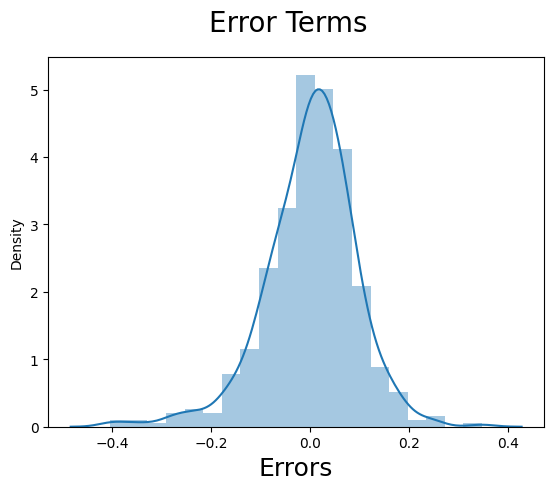

In [91]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

### Prediction on Test setup:
- We need to so same scaling on the test set that we did on the prediction set.
- We never use .fit on the test set because in ML we never use test set to make
  predictions or anything. Our test set is the unseen data and we still don't have it.
- We pretend we don't have that data.
- We only transform on the test set and not fit.

In [92]:
#  Transform the numerical variables
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

- Dividing the test set into x_test and y_test


In [93]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [94]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test)


In [95]:
X_test_1 = X_test_1.drop(['holiday_No Holiday' ,'workingday_Working Day', 'hum', 'season_spring', 'mnth_July', 'weekday_Sun', 'weekday_Mon' , 'mnth_Oct', 'weekday_Sat', 'mnth_Mar', 'mnth_May', 'mnth_June', 'weekday_Thru', 'weekday_Tue', 'mnth_Nov', 'mnth_Feb', 'mnth_Dec', 'weekday_Wed', 'mnth_Jan'], axis = 1)


In [96]:
# Making predictions using the fourth model

y_pred_1 = lr_20.predict(X_test_1)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [98]:
r_squared = r2_score(y_test, y_pred_1)
r_squared

0.7910951880182204

Text(0, 0.5, 'y_pred')

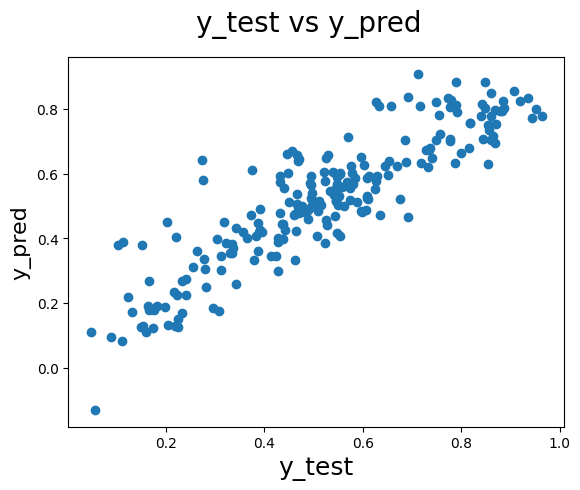

In [99]:

 #### Plot the y_test and y_pred on a graphic

fig = plt.figure()
plt.scatter(y_test, y_pred_1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)